## Building a Period Prediction Linear Regression Model

This notebook demonstrates the process of building a linear regression model to predict menstrual cycle periods.

**Dataset:** 
The dataset used in this analysis was obtained from Kaggle
#### Purpose
With this, girls can predict their next period, stand out without what if? and now the changes that goes on in their bodies 


In [69]:
#importing EDA libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#import Ml libraries 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


In [70]:
#importing dataset

data = pd.read_csv("menstrual_tracking_data.csv")

## EXPLORING THE DATASET

In [71]:
#displaying the first 5 rows
data.head(5)

,user_id,login_date,cycle_length,period_duration,symptoms,nextperiod_date
0,1,8/18/2023,27,4,"bloating, fatigue, acne",9/14/2023
1,2,7/8/2023,24,3,"acne, bloating",8/1/2023
2,3,3/1/2023,33,7,"cramps, bloating",4/3/2023
3,4,9/5/2023,35,6,"bloating, cramps, fatigue",10/10/2023
4,5,6/2/2023,31,4,fatigue,7/3/2023


In [72]:
#displaying the column names
data.columns

Index(['user_id', 'login_date', 'cycle_length', 'period_duration', 'symptoms',
       'nextperiod_date'],
      dtype='object')

In [73]:
#information about the dataset
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          500 non-null    int64 
 1   login_date       500 non-null    object
 2   cycle_length     500 non-null    int64 
 3   period_duration  500 non-null    int64 
 4   symptoms         500 non-null    object
 5   nextperiod_date  500 non-null    object
dtypes: int64(3), object(3)
memory usage: 23.6+ KB


(500, 6)

In [74]:
#describing numerical values 
data.describe()

,user_id,cycle_length,period_duration
count,500.000000,500.000000,500.000000
mean,250.500000,27.846000,5.032000
std,144.481833,4.367199,1.461248
min,1.000000,21.000000,3.000000
25%,125.750000,24.000000,4.000000
50%,250.500000,28.000000,5.000000
75%,375.250000,32.000000,6.000000
max,500.000000,35.000000,7.000000


In [75]:
#describing non-numerical values 
data.describe(include='O')

,login_date,symptoms,nextperiod_date
count,500,500,500
unique,359,128,358
top,9/8/2023,acne,9/29/2023
freq,5,32,4


In [76]:
#checking for null values 
data.isnull()
data.isnull().sum()
##

user_id            0
login_date         0
cycle_length       0
period_duration    0
symptoms           0
nextperiod_date    0
dtype: int64

In [77]:
#checking the next period date
data[["cycle_length"]].max()

cycle_length    35
dtype: int64

In [78]:
#checking the data types
data.dtypes

user_id             int64
login_date         object
cycle_length        int64
period_duration     int64
symptoms           object
nextperiod_date    object
dtype: object

In [79]:
data['login_date']  = pd.to_datetime(data['login_date'])
data['nextperiod_date'] = pd.to_datetime(data['nextperiod_date'])

data['login_date'].dtypes

dtype('<M8[ns]')

## Visualisations 

In [80]:
data = data.drop(columns='symptoms')

In [81]:
corrh = data.corr()
print(data)

     user_id login_date  cycle_length  period_duration nextperiod_date
0          1 2023-08-18            27                4      2023-09-14
1          2 2023-07-08            24                3      2023-08-01
2          3 2023-03-01            33                7      2023-04-03
3          4 2023-09-05            35                6      2023-10-10
4          5 2023-06-02            31                4      2023-07-03
..       ...        ...           ...              ...             ...
495      496 2022-09-25            33                4      2022-10-28
496      497 2023-10-17            30                6      2023-11-16
497      498 2023-07-25            27                4      2023-08-21
498      499 2023-05-04            30                3      2023-06-03
499      500 2023-06-22            23                6      2023-07-15

[500 rows x 5 columns]


<Axes: >

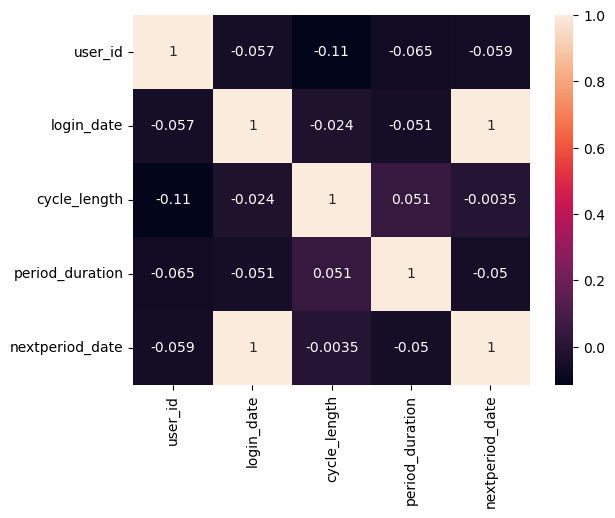

In [82]:
sns.heatmap(corrh, annot =True)